In [33]:
import time
import sys
import math

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
bleu_scores = {
    'exp002-1.1': [
        13.05, # 1
        15.54,
        16.82,
        17.12,
        16.73,
        17.13,
        17.87,
        17.86,
        17.56,
        18.03,
        18.06,
        18.07,
        18.05,
        18.30,
        18.10,
        18.08,
        18.24,
        17.96,
        17.88,
        18.07, # 20
    ],
    'exp002-1.2': [
       3.04, # 1
       4.05,
       4.63,
       5.28,
       5.55,
       5.48, # 6
    ],
    'exp002-4.1a': [
         8.82, # 1
        11.63,
        12.19,
        12.93,
        13.09,
        13.47,
        13.40,
        13.51, 
        13.70,
        13.03,
        14.08,
        13.81,
        14.09,
        13.65, # 14
    ],
    'exp002-4.1b': [
       
    ],
    'exp003-1.1': [ 
        21.16, # 1
        24.64,
        24.50,
        26.17,
        26.71,
        27.14,
        27.39,
        27.53,
        27.61,
        27.74,
        27.82,
        27.73,
        27.94,
        28.06,
        28.14,
        28.15,
        27.94,
        27.63,
        27.84,
        27.83, # 20
    ],
}

In [42]:

def plot_bleu_score_over_n_epoch(exp_name):
    y = bleu_scores[exp_name]
    n_epochs = len(y) + 1

    sns.set(rc={'figure.figsize':(15,8)})

    ax = sns.lineplot(x=range(1, n_epochs, 1),
                      y=y,
                      palette="rocket")
    ax.set_title('BLEU score for epoch 1 to {} ({})'.format(n_epochs - 1, exp_name))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('BLEU Score')
    ax.set_yticks(np.arange(math.floor(min(y)), math.ceil(max(y)), 0.5))

    ax.set_xticks(np.arange(1, n_epochs, 1))
    print('')

### exp002-1.1 (Transformer BASE, EN->TH, word->word)

In the experiment setup,

The vocaburary used is ins word-level (from `pythainlp.tokenize.newmm`).

The vocabulary for 

- source language (en) : 99999

- target language (th) : 88847

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.269%   |
| en-valid  | 0.452%   |
| en-test   | 0.456%   |
| th-train  | 0.0%     |
| th-valid  | 0.175%   |
| th-test   | 0.176%   |

__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perrplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

```
fairseq-train data/opensubtitles_bin/newmm-newmm/en-th \
		--seed 1 \
		--max-epoch 20 \
		--best-checkpoint-metric ppl \
    --arch transformer \
		--dropout 0.1 \
		--optimizer adam --adam-betas '(0.9, 0.98)' --clip-norm 25 \
		--lr 5e-4 --lr-scheduler inverse_sqrt --warmup-updates 5000 \
		--weight-decay 0.0001 \
		--criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 3000 \
    --save-dir data/opensubtitles_model/exp002-1/transformer_base \
		--tokenizer space \
		--no-progress-bar \
		--log-interval 250
    --num-workers 12 \
    --tensorboard-logdir data/opensubtitles_model/exp002-1/transformer_base/tensorboard_log
```



__Model Training__

- average words per batch = 2340

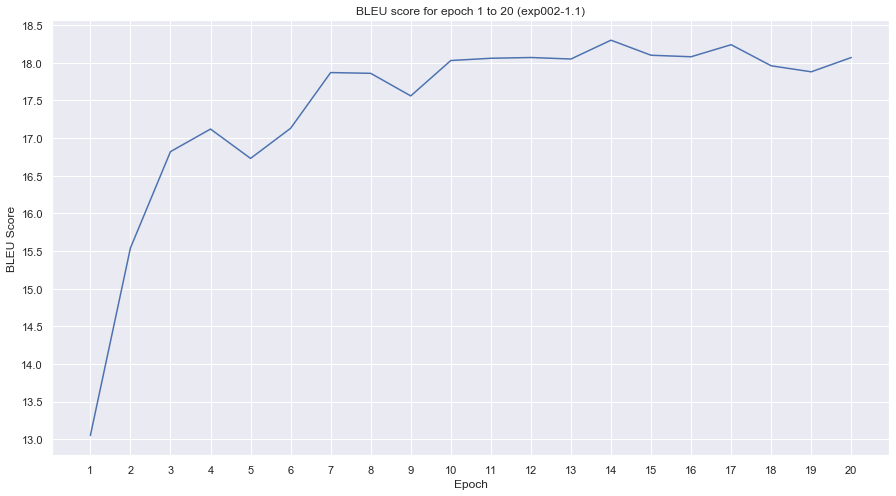

In [43]:
plot_bleu_score_over_n_epoch('exp002-1.1')

### exp002-4.1a (Transformer BASE, EN->TH, sentencepiece->sentencepiece [shared])

In the experiment setup (a),

The vocaburary used is in subword-level (from SentencePiece pretrained model BPEmb).

The vocabulary is shared between source and target language (total number of vocab size: 42760)

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.0%     |
| en-valid  | 0.00309% |
| en-test   | 0.00353% |
| th-train  | 0.0%     |
| th-valid  | 0.00286% |
| th-test   | 0.00334% |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.0 (default of `transformer` = 0.0)
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perrplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 4000



__Model Training__

- average words per batch = 3165 (because of increased `max_tokens`)

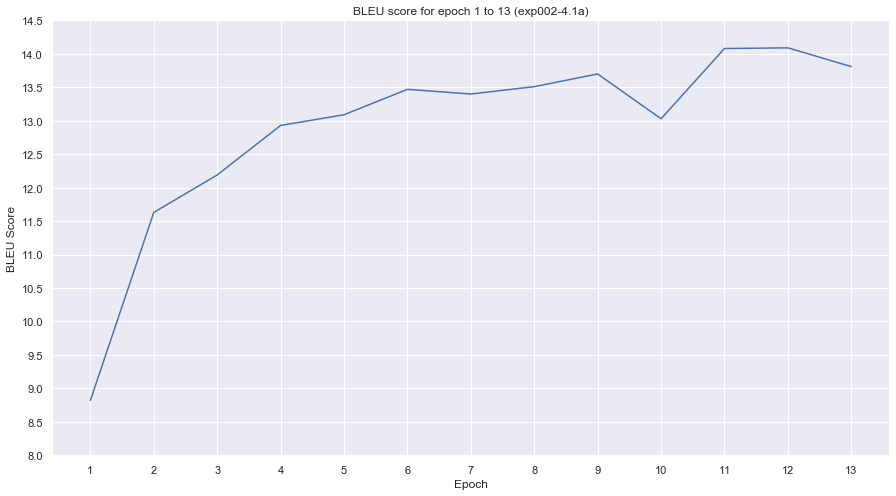

In [50]:
plot_bleu_score_over_n_epoch('exp002-4.1a')

### exp002-4.1b (Transformer BASE, EN->TH, sentencepiece->sentencepiece [shared])

__Note: I change the `dropout` to 0.1 from 0.0 to make it consistent with original `exp002-1.1`__

In the experiment setup (b)

The vocaburary used is in subword-level (from SentencePiece pretrained model BPEmb).

The vocabulary is shared between source and target language (total number of vocab size: 42760)

| Language  |  OOV (%) |
|-----------|----------|
| en-train  | 0.0%     |
| en-valid  | 0.00309% |
| en-test   | 0.00353% |
| th-train  | 0.0%     |
| th-valid  | 0.00286% |
| th-test   | 0.00334% |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1 **(set to 0.1 to be the same as exp002-1.1)**
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000 **(change from 4000 to 3000 to make the hyperparams be the same as exp002-1.1)**



In [53]:
# plot_bleu_score_over_n_epoch('exp002-4.1b')


### exp003-1.1 (Transformer BASE, TH->EN, word->word)


In the experiment setup

The vocaburary used is in word-level (from `pythainlp.tokenize.newmm`).

The vocabulary

- source language (th) : 88847

- target language (en) : 99999

| Language  |  OOV (%) |
|-----------|----------|
| th-train  | 0.0%     |
| th-valid  | 0.175%   |
| th-test   | 0.176%   |
| en-train  | 0.269%   |
| en-valid  | 0.452%   |
| en-test   | 0.456%   |


__Model Hyperparameters__

- architecture: transformer 
- dropout: 0.1
- optimizer: adam with adam-betas = (0.9, 0.98)
- best checkpoint metric: perplexity
- max epoch: 20
- seed: 1
- learning rate: 5e-4
- learning rate schuduler: inverse_sqrt
- warmup updates: 5000
- max tokens: 3000

__Model Training__

- average words per batch = 

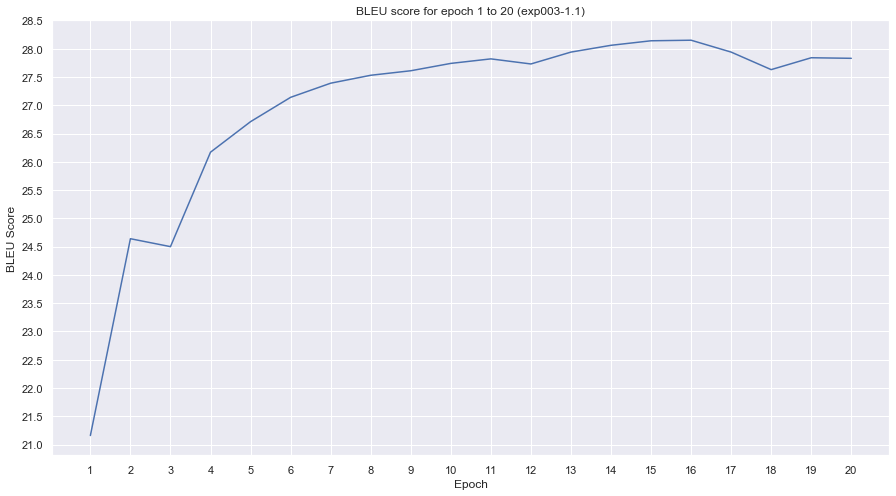

In [49]:
plot_bleu_score_over_n_epoch('exp003-1.1')